# CLUSTERING NEW USER INTO CLUSTERS FOUND

## TEAM : DaFi
### MEMBERS :
- GANDRA SAI KRISHNA (PES1UG20CS149)
- KARAN BHAT SUMBLY (PES1UG20CS193)
- SANIKA M RANGAYYAN (PES1UG20CS901)


In [1]:
import numpy as np 
import pandas as pd

### importing the dataset created from earlier file

In [2]:
df = pd.read_csv('customer_segments.csv')
df.head()

Unnamed: 0 gender  age                                id became_member_on  \
0           0      F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
1           1      F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
2           2      M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   
3           3      M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   
4           4      M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   

     income age_group income_group  cluster  
0  112000.0   46-55ys       > 105k      0.0  
1  100000.0   66-75ys      90-105k      4.0  
2   70000.0   66-75ys       60-75k      0.0  
3   53000.0   56-65ys       45-60k      2.0  
4   51000.0   56-65ys       45-60k      0.0

In [3]:
df.cluster.unique()

array([ 0.,  4.,  2.,  1.,  3., nan])

In [4]:
#removal of the nan values
df = df[df.cluster.notnull()]
df.cluster.unique()

array([0., 4., 2., 1., 3.])

In [5]:
df = df[['gender', 'age', 'income', 'age_group', 'income_group', 'cluster']]
df.head()

gender  age    income age_group income_group  cluster
0      F   55  112000.0   46-55ys       > 105k      0.0
1      F   75  100000.0   66-75ys      90-105k      4.0
2      M   68   70000.0   66-75ys       60-75k      0.0
3      M   65   53000.0   56-65ys       45-60k      2.0
4      M   58   51000.0   56-65ys       45-60k      0.0

In [6]:
#converting gender into binary variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df.head()

gender  age    income age_group income_group  cluster
0       0   55  112000.0   46-55ys       > 105k      0.0
1       0   75  100000.0   66-75ys      90-105k      4.0
2       1   68   70000.0   66-75ys       60-75k      0.0
3       1   65   53000.0   56-65ys       45-60k      2.0
4       1   58   51000.0   56-65ys       45-60k      0.0

- so as we can see here the gender variable is converted into binary with 0 when female and 1 when male

### visualising the distributions for data

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Text(0.5, 1.0, 'Clustering (k=5)')

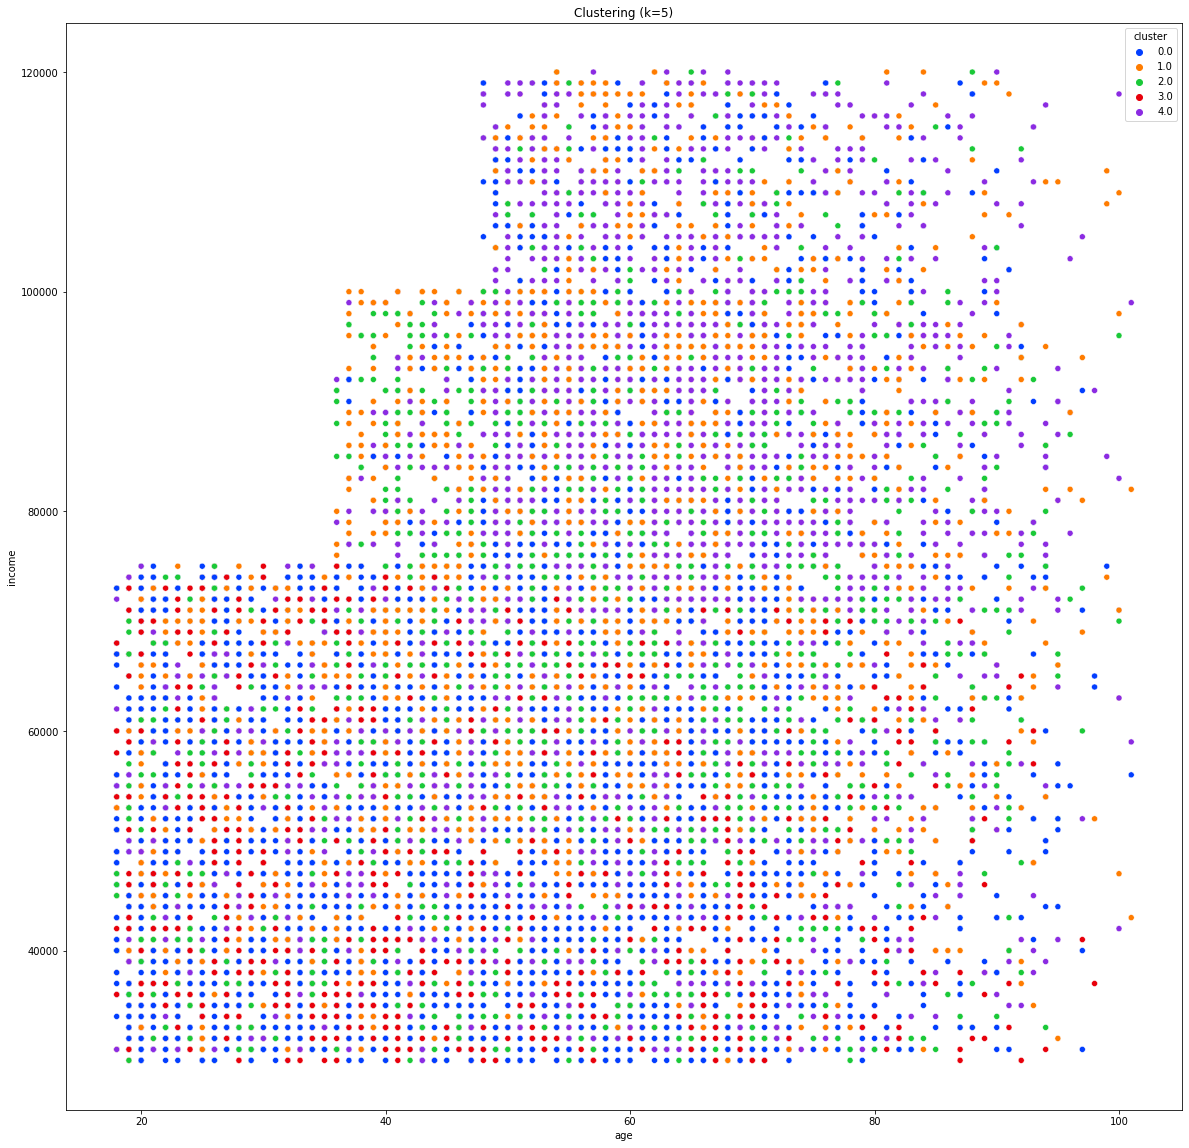

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x="age", y="income", data=df, 
                palette=sns.color_palette("bright",5),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(5)+')')

- as we can see we can try to plot the new data point and try to find the k nearest neighbours and then come into conclusions

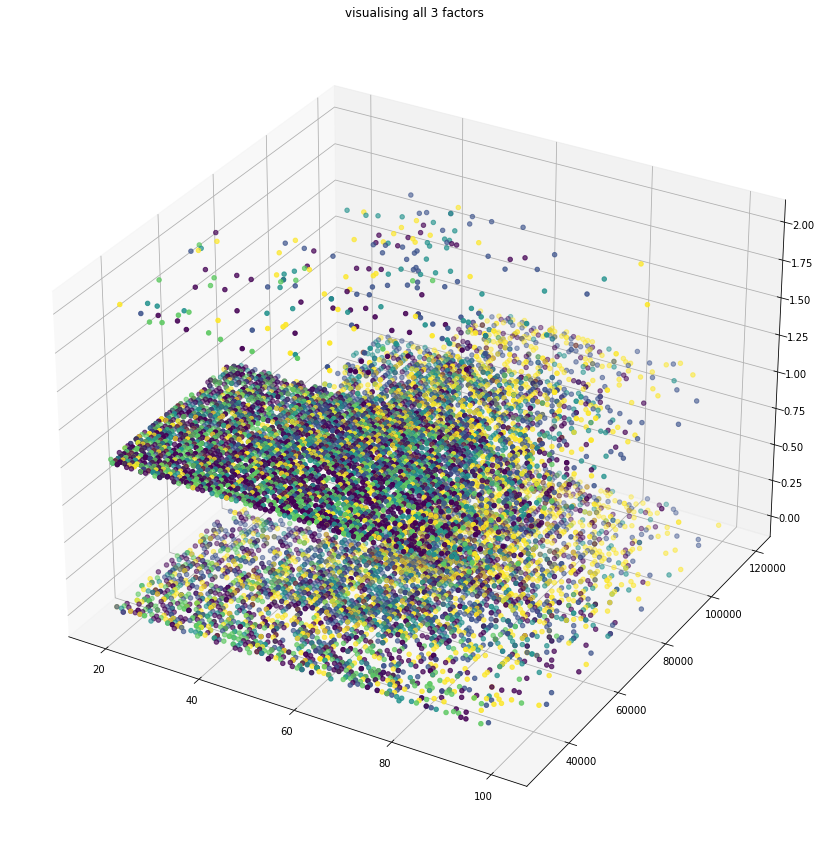

In [9]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(15,15))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

z= df['gender']
# defining axes
ax.scatter(df['age'], df['income'], df['gender'],c=df['cluster'])
 
# syntax for plotting
ax.set_title('visualising all 3 factors')
plt.show()

Text(0.5, 1.0, 'data visualisation for Female customers')

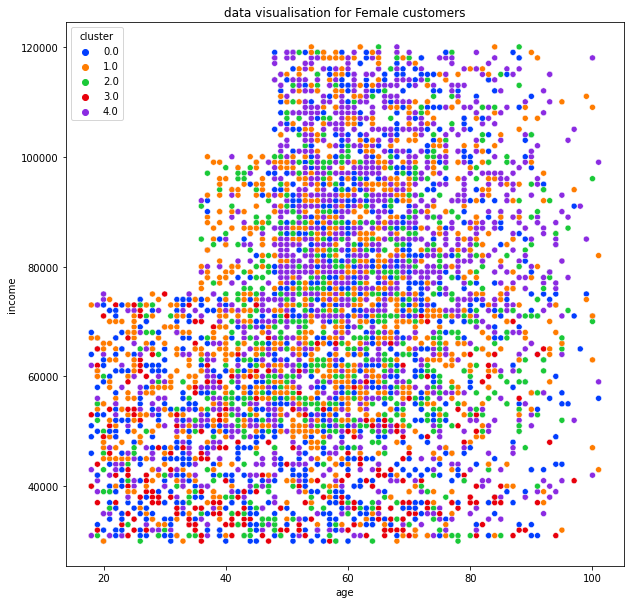

In [10]:
df1=df[df['gender']==0]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="age", y="income", data=df1, 
                palette=sns.color_palette("bright",5),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('data visualisation for Female customers')

Text(0.5, 1.0, 'data visualisation for Male customers')

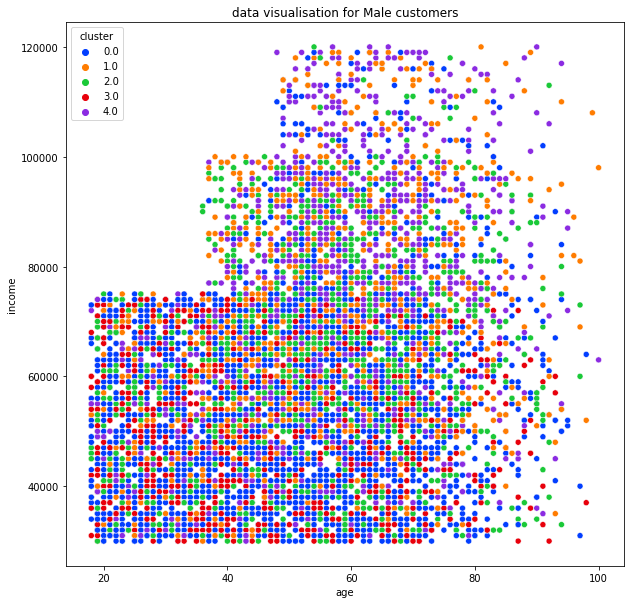

In [11]:
df1=df[df['gender']==1]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="age", y="income", data=df1, 
                palette=sns.color_palette("bright",5),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('data visualisation for Male customers')

Text(0.5, 1.0, 'data visualisation for other customers')

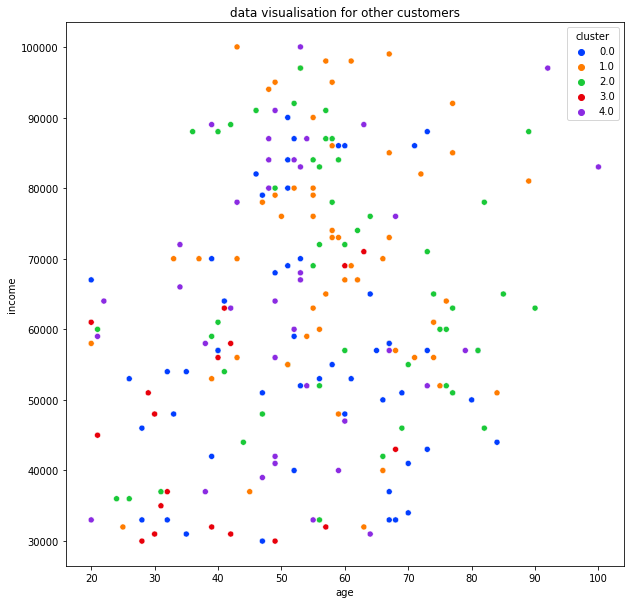

In [12]:
df1=df[df['gender']==2]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="age", y="income", data=df1, 
                palette=sns.color_palette("bright",5),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('data visualisation for other customers')

Text(0.5, 1.0, 'Clustering (k=5)')

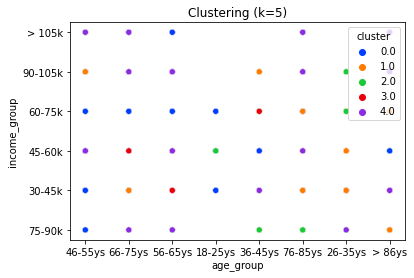

In [13]:
fig, ax = plt.subplots()
sns.scatterplot(x="age_group", y="income_group", data=df, 
                palette=sns.color_palette("bright",5),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(5)+')')

### separerate cluster visualisation

In [14]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]
cluster3 = df[df['cluster']==3]
cluster4 = df[df['cluster']==4]

<AxesSubplot:xlabel='gender', ylabel='Count'>

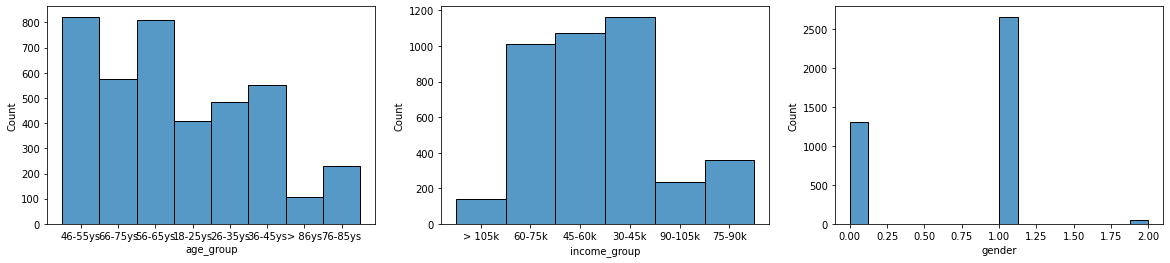

In [15]:
#for cluster 0
fig, axs = plt.subplots(1,3, figsize = (20,4))
sns.histplot(data = cluster0, x = 'age_group', ax = axs[0])
sns.histplot(data = cluster0, x = 'income_group', ax = axs[1])
sns.histplot(data = cluster0, x = 'gender', ax = axs[2])

<AxesSubplot:xlabel='gender', ylabel='Count'>

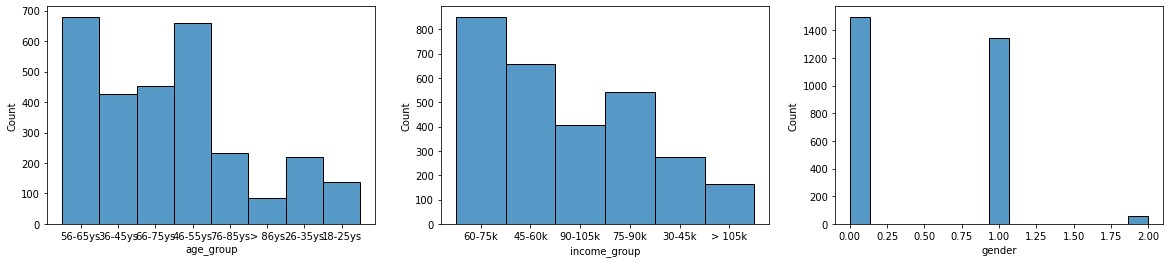

In [16]:
#for cluster 1
fig, axs = plt.subplots(1,3, figsize = (20,4))
sns.histplot(data = cluster1, x = 'age_group', ax = axs[0])
sns.histplot(data = cluster1, x = 'income_group', ax = axs[1])
sns.histplot(data = cluster1, x = 'gender', ax = axs[2])

<AxesSubplot:xlabel='gender', ylabel='Count'>

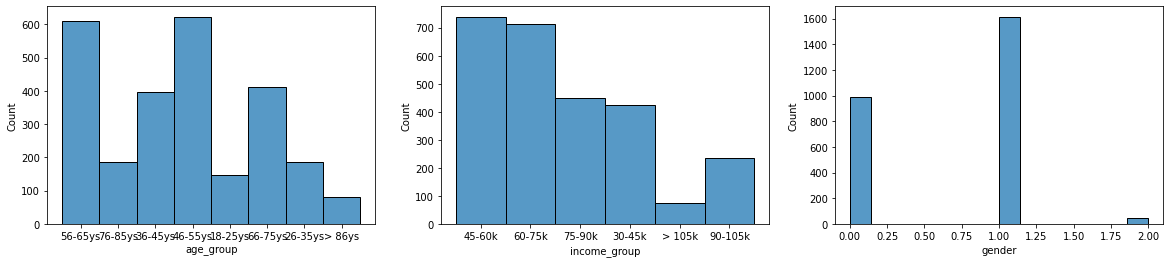

In [17]:
#for cluster 2
fig, axs = plt.subplots(1,3, figsize = (20,4))
sns.histplot(data = cluster2, x = 'age_group', ax = axs[0])
sns.histplot(data = cluster2, x = 'income_group', ax = axs[1])
sns.histplot(data = cluster2, x = 'gender', ax = axs[2])

<AxesSubplot:xlabel='gender', ylabel='Count'>

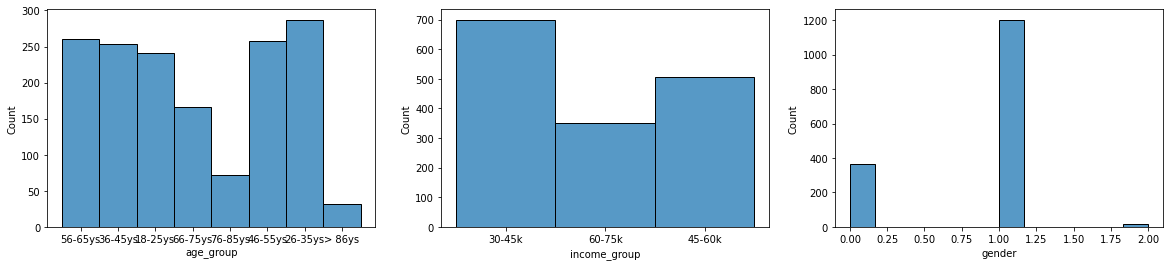

In [18]:
#for cluster 3
fig, axs = plt.subplots(1,3, figsize = (20,4))
sns.histplot(data = cluster3, x = 'age_group', ax = axs[0])
sns.histplot(data = cluster3, x = 'income_group', ax = axs[1])
sns.histplot(data = cluster3, x = 'gender', ax = axs[2])

<AxesSubplot:xlabel='gender', ylabel='Count'>

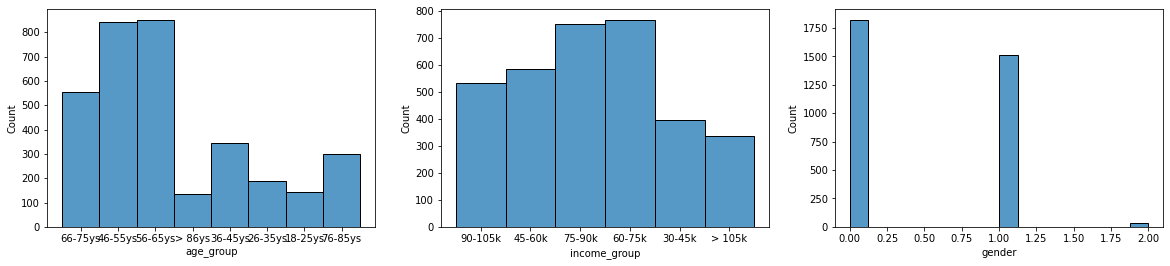

In [19]:
#for cluster 4
fig, axs = plt.subplots(1,3, figsize = (20,4))
sns.histplot(data = cluster4, x = 'age_group', ax = axs[0])
sns.histplot(data = cluster4, x = 'income_group', ax = axs[1])
sns.histplot(data = cluster4, x = 'gender', ax = axs[2])

### prediction using XG-boost

#### as the number of variables/features are less than the no. of classes therefore we can go ahead with increasing the number of features

In [20]:
income_to_age = df['income']/df['age']
income_to_age

0        2036.363636
1        1333.333333
2        1029.411765
3         815.384615
4         879.310345
            ...     
14820    1200.000000
14821    1180.327869
14822    1489.795918
14823     602.409639
14824    1322.580645
Length: 14528, dtype: float64

In [21]:
df_1=df.copy()
df_1['income_to_age']=income_to_age

df_1.head()

gender  age    income age_group income_group  cluster  income_to_age
0       0   55  112000.0   46-55ys       > 105k      0.0    2036.363636
1       0   75  100000.0   66-75ys      90-105k      4.0    1333.333333
2       1   68   70000.0   66-75ys       60-75k      0.0    1029.411765
3       1   65   53000.0   56-65ys       45-60k      2.0     815.384615
4       1   58   51000.0   56-65ys       45-60k      0.0     879.310345

In [22]:
df_1.corr(method ='pearson')

gender       age    income   cluster  income_to_age
gender         1.000000 -0.146565 -0.221786 -0.086371      -0.025682
age           -0.146565  1.000000  0.305293  0.068047      -0.633621
income        -0.221786  0.305293  1.000000  0.138027       0.440298
cluster       -0.086371  0.068047  0.138027  1.000000       0.026336
income_to_age -0.025682 -0.633621  0.440298  0.026336       1.000000

In [23]:
from sklearn.model_selection import train_test_split
x = df_1[['gender', 'age', 'income','income_to_age']].values
y = df_1.iloc[:,-2].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(xtrain,ytrain)
print(model_xgb.score(xtrain,ytrain))

0.7045258991567717


In [25]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(ytrain,model_xgb.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72      3193
         1.0       0.72      0.70      0.71      2329
         2.0       0.70      0.64      0.67      2109
         3.0       0.68      0.63      0.65      1282
         4.0       0.72      0.74      0.73      2709

    accuracy                           0.70     11622
   macro avg       0.70      0.69      0.70     11622
weighted avg       0.70      0.70      0.70     11622



In [26]:
print(classification_report(ytest,model_xgb.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.32      0.33      0.32       825
         1.0       0.23      0.23      0.23       572
         2.0       0.19      0.18      0.19       540
         3.0       0.21      0.19      0.20       302
         4.0       0.31      0.32      0.32       667

    accuracy                           0.27      2906
   macro avg       0.25      0.25      0.25      2906
weighted avg       0.26      0.27      0.26      2906



### using random forests

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)

In [28]:
print(classification_report(ytrain,clf.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      3193
         1.0       0.72      0.70      0.71      2329
         2.0       0.69      0.65      0.67      2109
         3.0       0.69      0.62      0.65      1282
         4.0       0.73      0.73      0.73      2709

    accuracy                           0.70     11622
   macro avg       0.70      0.69      0.70     11622
weighted avg       0.70      0.70      0.70     11622



In [29]:
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 0.26531314521679283


### using k- nearest neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
  
knn.fit(xtrain, ytrain)
  
# Predict on dataset which model has not seen before
print(knn.predict(xtest))

[0. 4. 0. ... 4. 2. 0.]


In [31]:
print(classification_report(ytrain,knn.predict(xtrain)))

              precision    recall  f1-score   support

         0.0       0.40      0.63      0.49      3193
         1.0       0.38      0.34      0.35      2329
         2.0       0.36      0.22      0.28      2109
         3.0       0.37      0.17      0.23      1282
         4.0       0.45      0.43      0.44      2709

    accuracy                           0.40     11622
   macro avg       0.39      0.36      0.36     11622
weighted avg       0.40      0.40      0.38     11622



In [32]:
print(knn.score(xtest, ytest))

0.29318651066758433


- from the above values of accuracy we can state that the data is not sufficient enough to classify as there is no proper accuracy in the models 
- although xgboost and random forests give an accuracy of 70% for training data but for testing data the accuracy is less than 30%
- similarly for the k-nn classifier we get very less accuracy as shown above with training accuracy of : 40% and testing accuracy of 30%

therefore for predicting the new users offer recommendation we would have to use the other methodolgy like content based filtering whch has been implemented later